### Problem 1: Linear Regression

### Problem Statement
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [2]:
df = pd.read_csv(r'C:\Me\GreatLakes\05_Predictive Modeling\Week4\cubic_zirconia.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.shape

(26967, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df.describe().round(2)

,carat,depth,table,x,y,z,price
count,26967.00,26270.00,26967.00,26967.00,26967.00,26967.00,26967.00
mean,0.80,61.75,57.46,5.73,5.73,3.54,3939.52
std,0.48,1.41,2.23,1.13,1.17,0.72,4024.86
min,0.20,50.80,49.00,0.00,0.00,0.00,326.00
25%,0.40,61.00,56.00,4.71,4.71,2.90,945.00
50%,0.70,61.80,57.00,5.69,5.71,3.52,2375.00
75%,1.05,62.50,59.00,6.55,6.54,4.04,5360.00
max,4.50,73.60,79.00,10.23,58.90,31.80,18818.00


In [6]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [7]:
dupes = df.duplicated()
print(sum(dupes))

34


In [8]:
df.drop_duplicates(inplace=True) 

In [9]:
#list of numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

#visualize the numerical variables
df[num_vars].head()

Number of numerical variables:  7


,carat,depth,table,x,y,z,price
1,0.30,62.1,58.0,4.27,4.29,2.66,499
2,0.33,60.8,58.0,4.42,4.46,2.70,984
3,0.90,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,60.4,59.0,4.35,4.43,2.65,779


In [10]:
#list of discrete variables
discrete_vars = [var for var in df.columns if len(df[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))
print(df[discrete_vars].nunique())

print("**************")
print("\n")

for i in discrete_vars:
    print(i, "\n", df[i].value_counts(), "\n")

Number of discrete variables:  3
cut        5
color      7
clarity    8
dtype: int64
**************


cut 
 Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64 

color 
 G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64 

clarity 
 SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64 



<AxesSubplot:xlabel='price', ylabel='Density'>

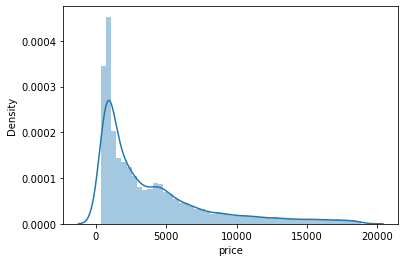

In [11]:
sns.distplot(df['price']) #Target Variable

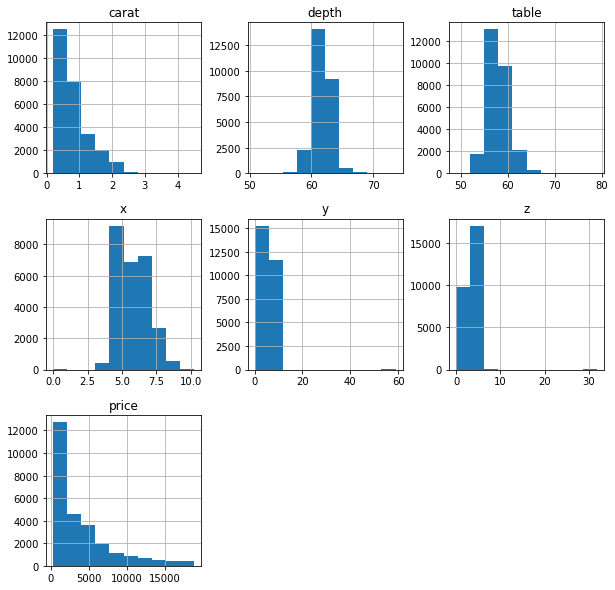

In [12]:
df.hist(figsize=(10,10));

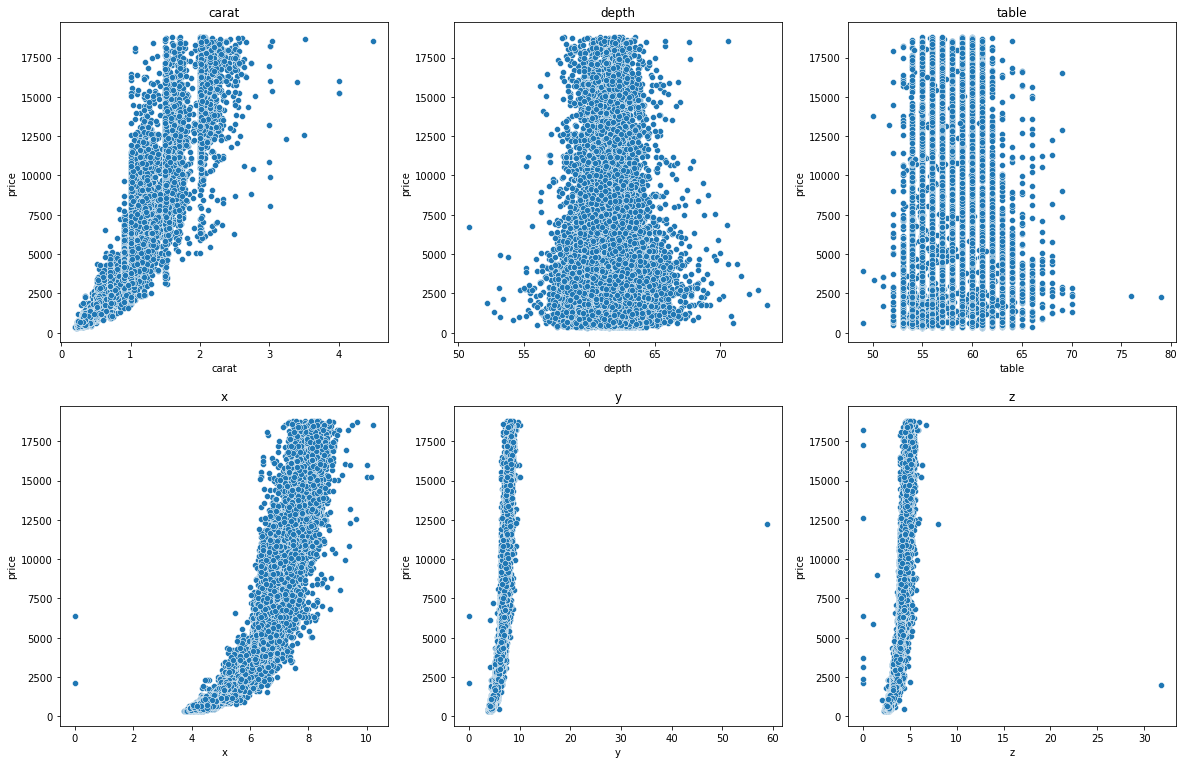

In [13]:
i = 1

plt.figure(figsize=(20,20))
for var in num_vars:
    if var not in 'price':
        plt.subplot(3,3,i)
        sns.scatterplot(data=df, x=var, y='price')
        plt.title(var)
        i = i+1

In [14]:
#def analyse_cont_vars(df, var):
#    plt.scatter(df[var], df['price'])
#    plt.ylabel('Price')
#    plt.xlabel(var)
#    plt.show()
    
#for var in num_vars:
#    if var not in 'price':
#    analyse_cont_vars(df, var)

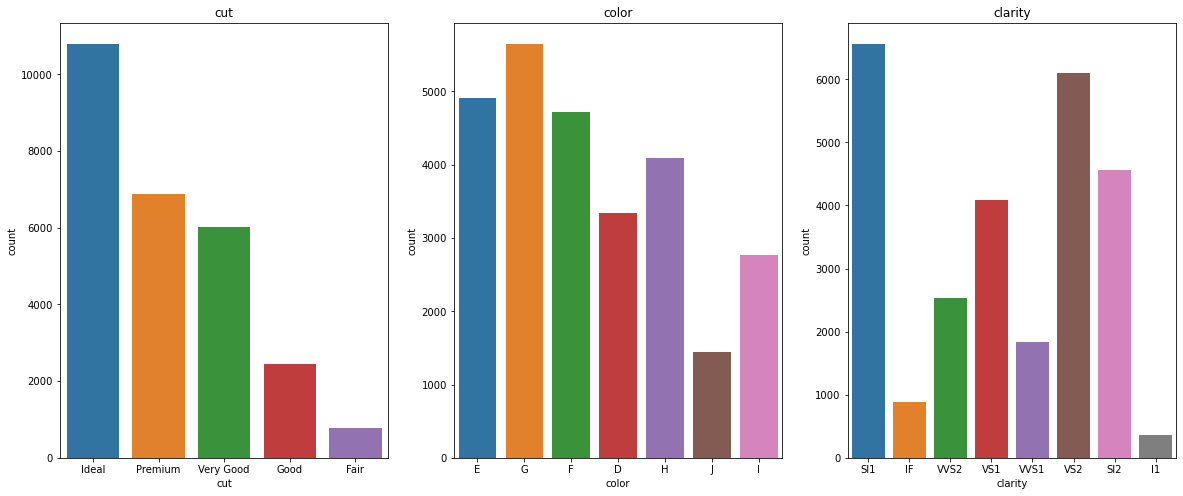

In [15]:
i = 1

plt.figure(figsize=(20,8))
for var in discrete_vars:
    plt.subplot(1,3,i)
    sns.countplot(data=df, x=var)
    plt.title(var)
    i = i+1

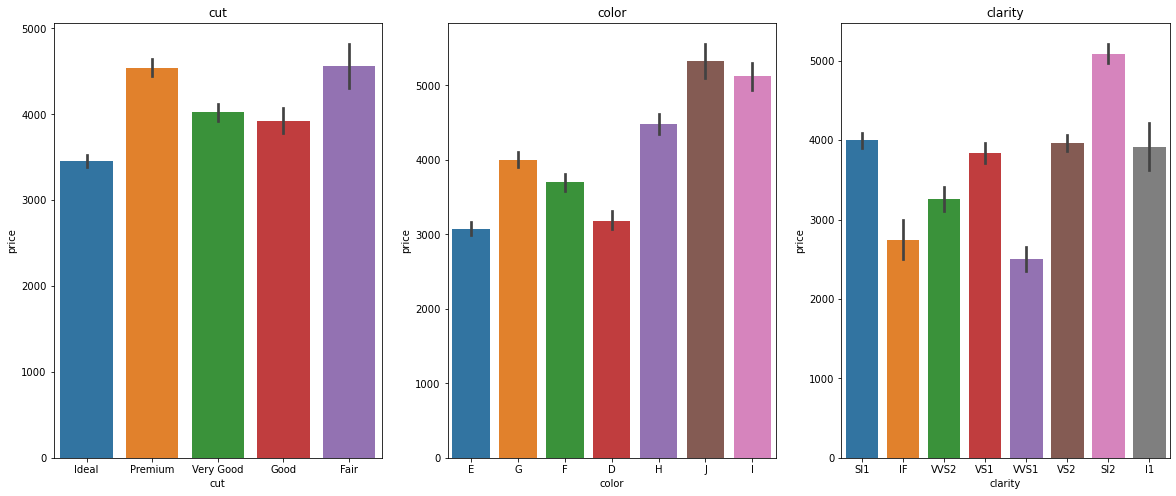

In [16]:
i = 1

plt.figure(figsize=(20,8))
for var in discrete_vars:
    plt.subplot(1,3,i)
    sns.barplot(data=df, x=var, y='price')
    plt.title(var)
    i = i+1

<AxesSubplot:xlabel='carat', ylabel='price'>

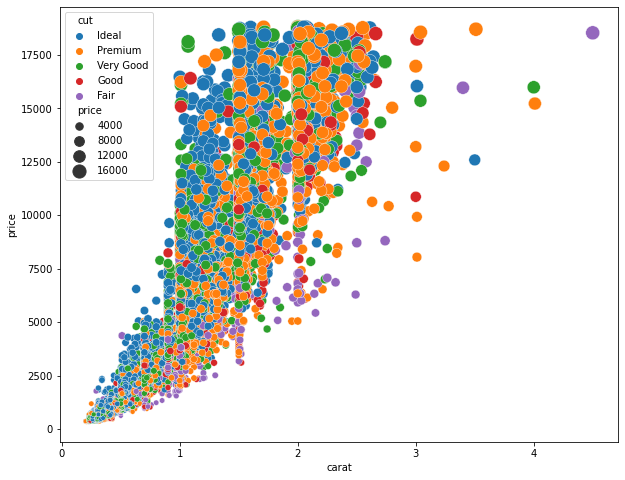

In [102]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='carat', y='price', hue='cut', size='price', sizes=(20,200))

<AxesSubplot:xlabel='carat', ylabel='price'>

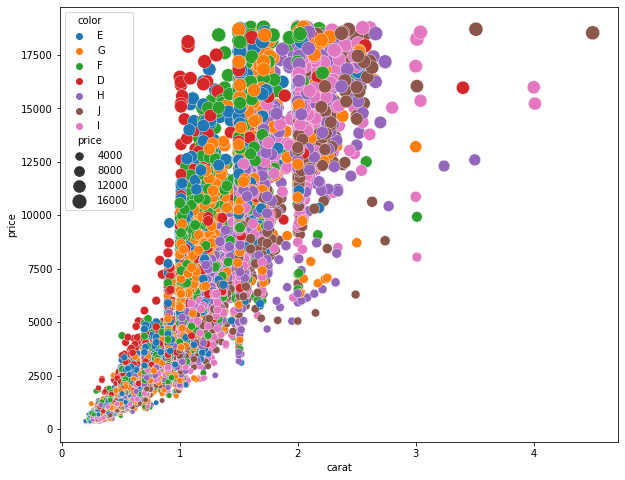

In [103]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='carat', y='price', hue='color', size='price', sizes=(20,200))

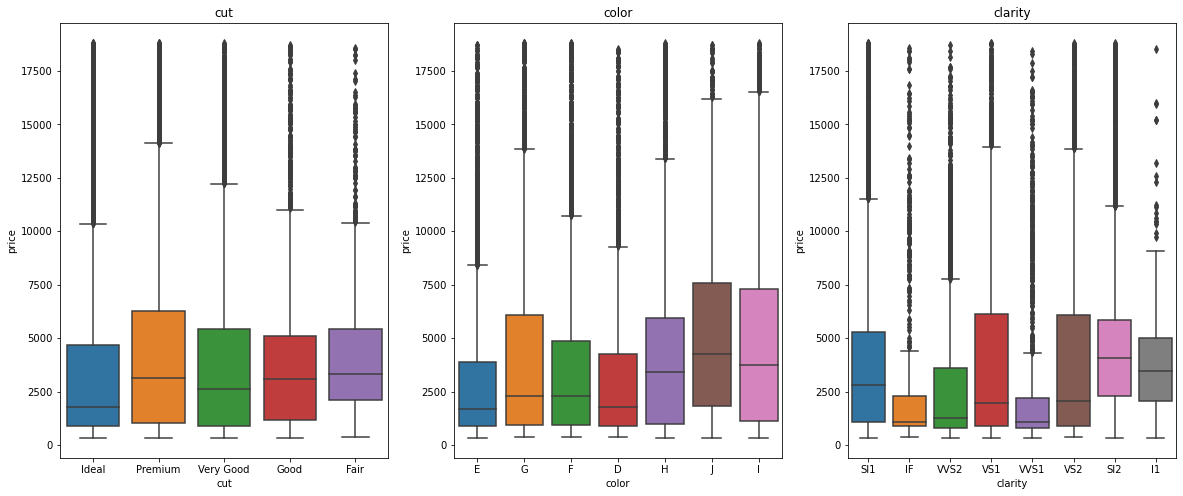

In [17]:
i = 1

plt.figure(figsize=(20,8))
for var in discrete_vars:
    plt.subplot(1,3,i)
    sns.boxplot(data=df, x=var, y='price')
    plt.title(var)
    i = i+1

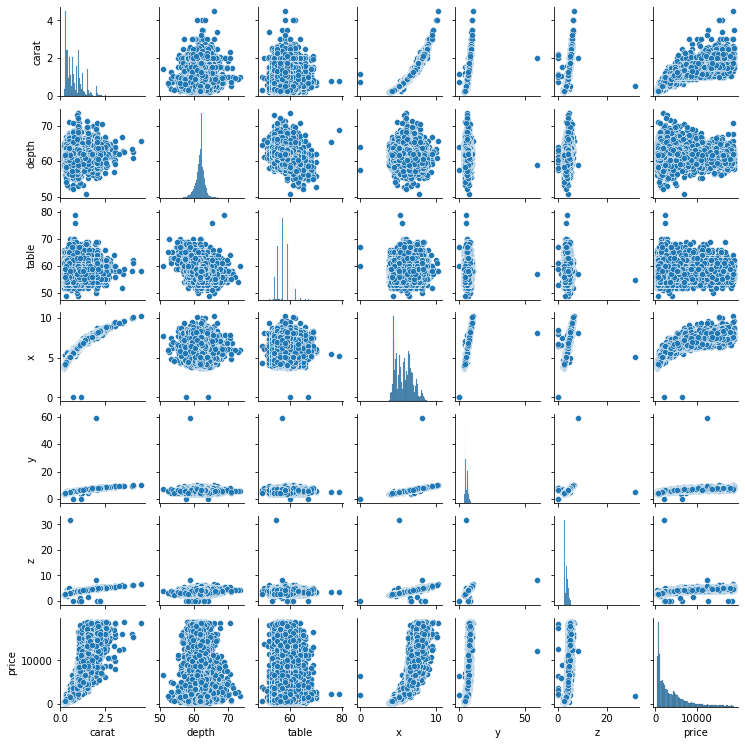

In [18]:
sns.pairplot(df, size=1.5);

<AxesSubplot:>

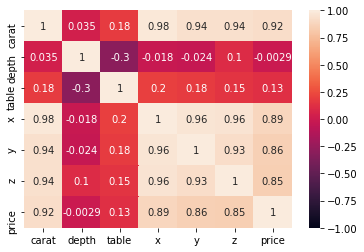

In [19]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

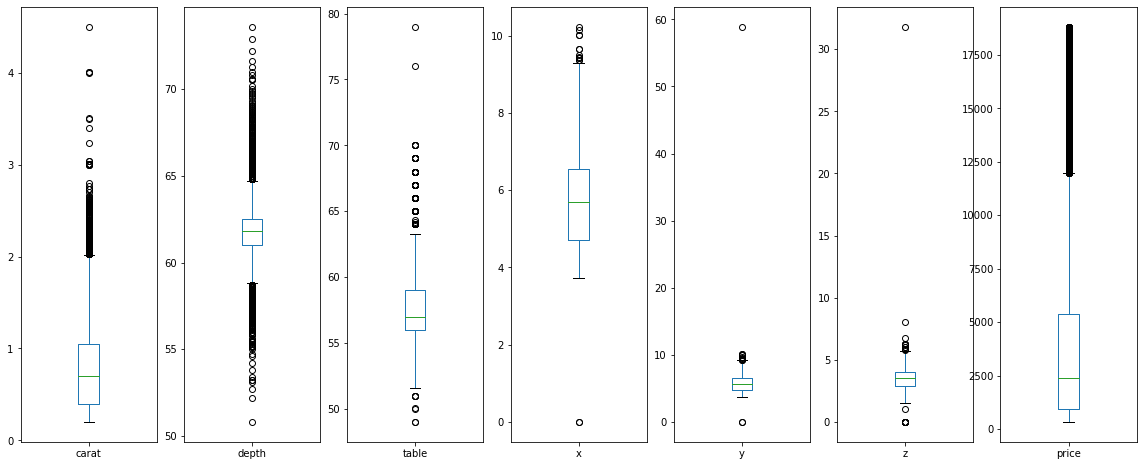

In [20]:
df[num_vars].plot(kind='box', subplots=True, figsize=(20,8));

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

### Missing data Imputation

In [21]:
mean_depth = df['depth'].mean()

In [22]:
df['depth'].median()

61.8

In [23]:
df['depth'] = df['depth'].fillna(mean_depth)

In [24]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
vars_zero = ['x', 'y', 'z']

In [26]:
for i in vars_zero:
    print(f"Column {i} has {len(df[df[i] == 0.0])} rows with values equal to 0")

Column x has 2 rows with values equal to 0
Column y has 2 rows with values equal to 0
Column z has 8 rows with values equal to 0


In [27]:
df[df['x'] == 0.0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [28]:
df[df['y'] == 0.0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [29]:
df[df['z'] == 0.0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [30]:
x_median = df['x'].median()
y_median = df['y'].median()
z_median = df['z'].median()

In [31]:
df['x'].replace(0.0, x_median, inplace=True)
df['y'].replace(0.0, y_median, inplace=True)
df['z'].replace(0.0, z_median, inplace=True)

In [32]:
for i in vars_zero:
    print(f"Column {i} has {len(df[df[i] == 0.0])} rows with values equal to 0")

Column x has 0 rows with values equal to 0
Column y has 0 rows with values equal to 0
Column z has 0 rows with values equal to 0


### Handling the Outliers

In [33]:
def find_skewed_boundaries(df, variable):

    #Let's calculate the boundary ranges for skewed distributions
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [34]:
df_outlier = df.copy()

In [35]:
for var in num_vars:
    upper_range, lower_range = find_skewed_boundaries(df_outlier, var)
    df_outlier[var] = np.where(df_outlier[var] > upper_range, upper_range, df_outlier[var])
    df_outlier[var] = np.where(df_outlier[var] < lower_range, lower_range, df_outlier[var])

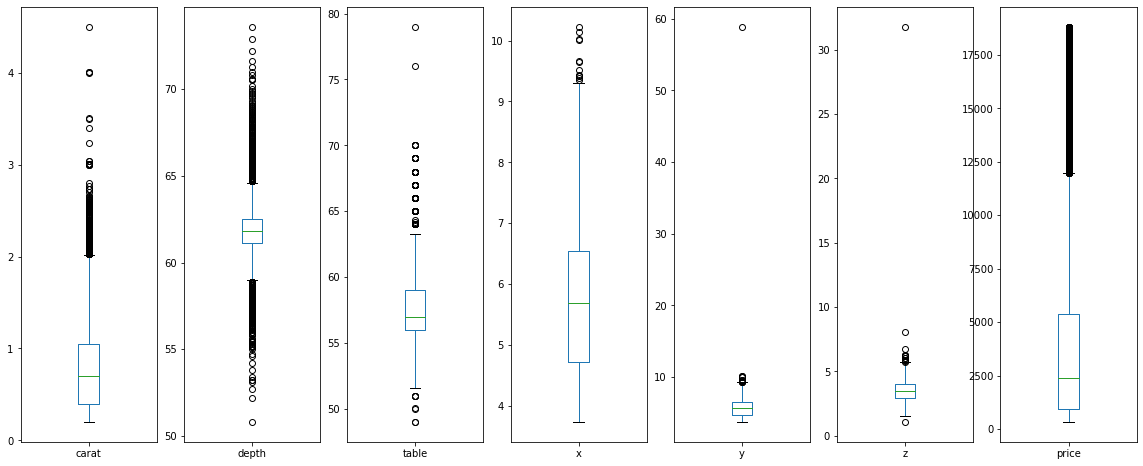

In [36]:
df[num_vars].plot(kind='box', subplots=True, figsize=(20,8));

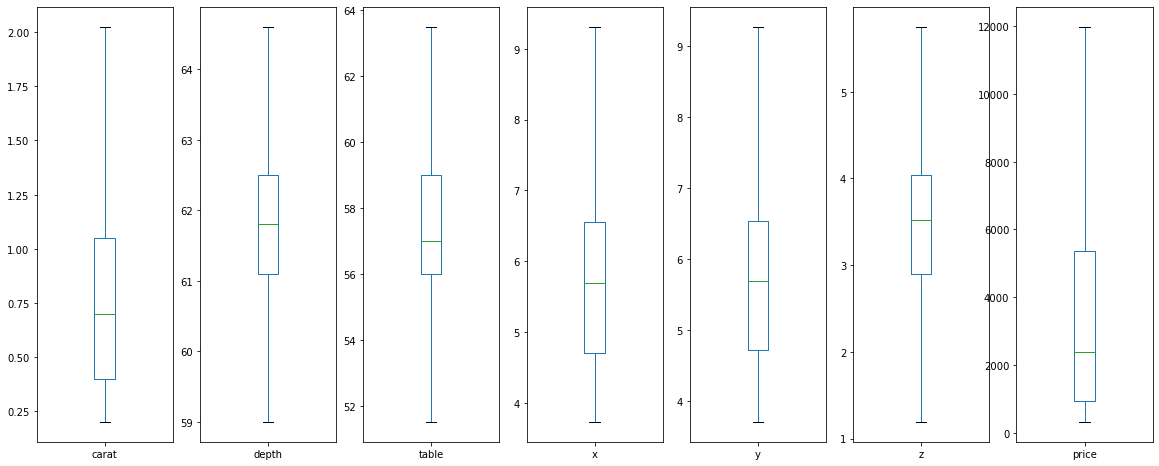

In [37]:
df_outlier[num_vars].plot(kind='box', subplots=True, figsize=(20,8));

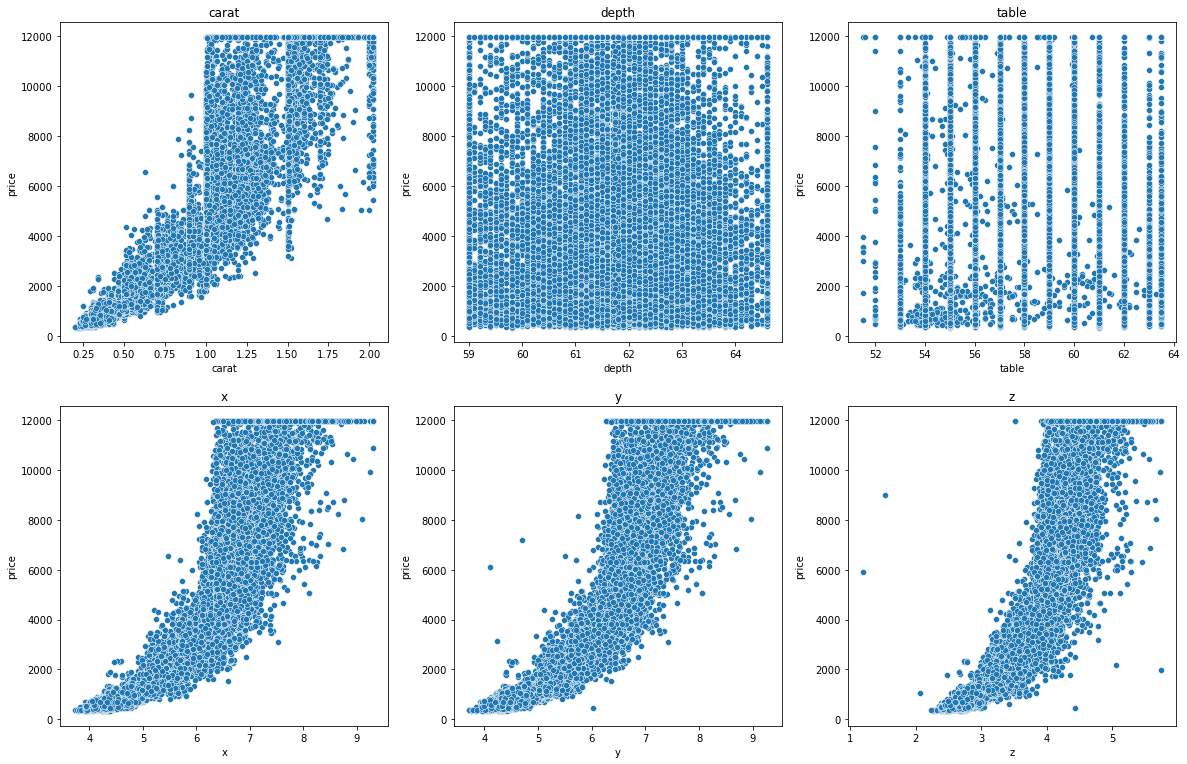

In [38]:
i = 1

plt.figure(figsize=(20,20))
for var in num_vars:
    if var not in 'price':
        plt.subplot(3,3,i)
        sns.scatterplot(data=df_outlier, x=var, y='price')
        plt.title(var)
        i = i+1

In [39]:
df_outlier.describe().round(2)

,carat,depth,table,x,y,z,price
count,26933.00,26933.00,26933.00,26933.00,26933.00,26933.00,26933.00
mean,0.79,61.75,57.44,5.73,5.73,3.54,3735.83
std,0.46,1.22,2.16,1.13,1.12,0.70,3468.21
min,0.20,59.00,51.50,3.73,3.71,1.19,326.00
25%,0.40,61.10,56.00,4.71,4.72,2.90,945.00
50%,0.70,61.80,57.00,5.69,5.70,3.52,2375.00
75%,1.05,62.50,59.00,6.55,6.54,4.04,5356.00
max,2.03,64.60,63.50,9.31,9.27,5.75,11972.50


### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

### Encoding

In [40]:
discrete_vars

['cut', 'color', 'clarity']

In [41]:
label_enc = LabelEncoder()

In [42]:
df_encoded = df_outlier.copy()
df_original = df.copy()

In [43]:
for var in discrete_vars:
    df_original[var] = label_enc.fit_transform(df_original[var])
    for k, v in enumerate(label_enc.classes_): 
        print(var, v,'==>', k)

cut Fair ==> 0
cut Good ==> 1
cut Ideal ==> 2
cut Premium ==> 3
cut Very Good ==> 4
color D ==> 0
color E ==> 1
color F ==> 2
color G ==> 3
color H ==> 4
color I ==> 5
color J ==> 6
clarity I1 ==> 0
clarity IF ==> 1
clarity SI1 ==> 2
clarity SI2 ==> 3
clarity VS1 ==> 4
clarity VS2 ==> 5
clarity VVS1 ==> 6
clarity VVS2 ==> 7


In [44]:
for var in discrete_vars:
    df_encoded[var] = label_enc.fit_transform(df_encoded[var])
    for k, v in enumerate(label_enc.classes_): 
        print(var, v,'==>', k)

cut Fair ==> 0
cut Good ==> 1
cut Ideal ==> 2
cut Premium ==> 3
cut Very Good ==> 4
color D ==> 0
color E ==> 1
color F ==> 2
color G ==> 3
color H ==> 4
color I ==> 5
color J ==> 6
clarity I1 ==> 0
clarity IF ==> 1
clarity SI1 ==> 2
clarity SI2 ==> 3
clarity VS1 ==> 4
clarity VS2 ==> 5
clarity VVS1 ==> 6
clarity VVS2 ==> 7


In [45]:
df_original.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
2,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
3,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [46]:
df_encoded.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
2,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0
3,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
4,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
5,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  int32  
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 3.2 MB


In [48]:
def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    print(X.shape)
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [49]:
X = df_encoded.iloc[:,:-1]
calculate_vif(X)

(26933, 9)


,variables,VIF
0,carat,119.969141
1,cut,7.671209
2,color,3.669549
3,clarity,6.300427
4,depth,971.138472
5,table,719.564779
6,x,10317.298601
7,y,9457.920514
8,z,2621.227844


In [50]:
X_scaled  = df_encoded.apply(zscore)

In [51]:
X = X_scaled.iloc[:,:-1]
calculate_vif(X)

(26933, 9)


,variables,VIF
0,carat,32.675402
1,cut,1.065715
2,color,1.101226
3,clarity,1.068987
4,depth,3.885856
5,table,1.182455
6,x,408.406194
7,y,392.474248
8,z,204.993996


### Data split

In [52]:
X = df_original.drop('price', axis=1)
y = df_original.pop('price')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [54]:
reg_model = LinearRegression()

In [55]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [56]:
reg_model.coef_

array([ 1.14688821e+04,  5.94129335e+01, -2.82707638e+02,  2.90151385e+02,
       -1.56516511e+02, -9.22170097e+01, -1.31199523e+03,  3.79160763e+00,
       -3.55460903e+01])

In [57]:
#for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[idx]))
    
pd.DataFrame(reg_model.coef_.reshape(9,1),
            index=X_train.columns, columns=['Coeff']
            )

,Coeff
carat,11468.882055
cut,59.412933
color,-282.707638
clarity,290.151385
depth,-156.516511
table,-92.217010
x,-1311.995229
y,3.791608
z,-35.546090


In [58]:
ytrain_pred = reg_model.predict(X_train)
ytest_pred = reg_model.predict(X_test)

In [59]:
def get_model_scores(y, y_pred):
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    return rmse, r2

In [60]:
rmse, r2 = get_model_scores(y_train, ytrain_pred)
print("Linear Regression Training set RMSE:", rmse)
print("Linear Regression Training set R2 SCORE:", r2)

rmse, r2 = get_model_scores(y_test, ytest_pred)
print("Linear Regression Test set RMSE:", rmse)
print("Linear Regression Test set R2 SCORE:", r2)

Linear Regression Training set RMSE: 1348.5122365968234
Linear Regression Training set R2 SCORE: 0.8868802224352846
Linear Regression Test set RMSE: 1347.046480642826
Linear Regression Test set R2 SCORE: 0.8895208640439118


In [61]:
calculate_vif(X_train)

(18853, 9)


,variables,VIF
0,carat,79.104620
1,cut,7.542941
2,color,3.674690
3,clarity,6.217567
4,depth,509.151880
5,table,515.922981
6,x,933.130320
7,y,247.137394
8,z,273.073883


In [62]:
X = df_encoded.drop('price', axis=1)
y = df_encoded.pop('price')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [64]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [65]:
ytrain_pred = reg_model.predict(X_train)
ytest_pred = reg_model.predict(X_test)

In [66]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[idx]))

pd.DataFrame(reg_model.coef_.reshape(9,1),
            index=X_train.columns, columns=['Coeff']
            )

The coefficient for carat is 9267.945270553215
The coefficient for cut is 49.47117836768885
The coefficient for color is -233.39732546295048
The coefficient for clarity is 253.36589378197667
The coefficient for depth is -50.68673044144954
The coefficient for table is -73.29769680890746
The coefficient for x is -1859.9853088424827
The coefficient for y is 1727.0807475534318
The coefficient for z is -915.1650190737838


,Coeff
carat,9267.945271
cut,49.471178
color,-233.397325
clarity,253.365894
depth,-50.686730
table,-73.297697
x,-1859.985309
y,1727.080748
z,-915.165019


In [67]:
rmse, r2 = get_model_scores(y_train, ytrain_pred)
print("Linear Regression Training set RMSE:", rmse)
print("Linear Regression Training set R2 SCORE:", r2)

rmse, r2 = get_model_scores(y_test, ytest_pred)
print("Linear Regression Test set RMSE:", rmse)
print("Linear Regression Test set R2 SCORE:", r2)

Linear Regression Training set RMSE: 1046.2463524495727
Linear Regression Training set R2 SCORE: 0.9088613904872603
Linear Regression Test set RMSE: 1030.1897601924256
Linear Regression Test set R2 SCORE: 0.9120617808817315


In [68]:
calculate_vif(X_train)

(18853, 9)


,variables,VIF
0,carat,120.519583
1,cut,7.759016
2,color,3.672543
3,clarity,6.310796
4,depth,974.673438
5,table,722.378148
6,x,11101.980365
7,y,10206.478817
8,z,2646.167922


In [69]:
std_scaler = StandardScaler()

In [70]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [71]:
X_train_scaled

array([[-0.98374233,  1.4090821 ,  0.81908314, ..., -1.17626173,
        -1.15926417, -1.12166084],
       [-1.07067646, -0.55190002, -0.94177905, ..., -1.22974717,
        -1.27595974, -1.28033463],
       [-0.63600582, -0.55190002,  0.23212908, ..., -0.57009339,
        -0.61169267, -0.53024037],
       ...,
       [ 0.92880847,  0.42859104,  1.40603721, ...,  1.07904105,
         1.03102184,  0.94109838],
       [ 0.51587137, -2.51288214, -1.52873312, ...,  0.53527239,
         0.46549718,  0.73914992],
       [ 0.90707494,  0.42859104,  0.81908314, ...,  0.9809844 ,
         0.95920919,  1.01322283]])

In [72]:
reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
ytrain_pred_sc = reg_model.predict(X_train_scaled)
ytest_pred_sc = reg_model.predict(X_test_scaled)

In [74]:
rmse, r2 = get_model_scores(y_train, ytrain_pred_sc)
print("Linear Regression Training set RMSE:", rmse)
print("Linear Regression Training set R2 SCORE:", r2)

rmse, r2 = get_model_scores(y_test, ytest_pred_sc)
print("Linear Regression Test set RMSE:", rmse)
print("Linear Regression Test set R2 SCORE:", r2)

Linear Regression Training set RMSE: 1046.246352449573
Linear Regression Training set R2 SCORE: 0.9088613904872602
Linear Regression Test set RMSE: 1030.1897601924259
Linear Regression Test set R2 SCORE: 0.9120617808817315


In [75]:
ridge = Ridge(alpha=0.001, normalize=True)
ridge.fit(X_train, y_train)
#print ("Ridge model:", (ridge.coef_))

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[idx]))
    
pd.DataFrame(ridge.coef_.reshape(9,1),
            index=X_train.columns, columns=['Coeff']
            )

The coefficient for carat is 8930.373704945012
The coefficient for cut is 55.06521516682447
The coefficient for color is -231.2930163671862
The coefficient for clarity is 255.38573818921824
The coefficient for depth is -57.3531118489381
The coefficient for table is -75.59108065808256
The coefficient for x is -1067.2600442159785
The coefficient for y is 964.7218161173041
The coefficient for z is -750.3835094888302


,Coeff
carat,8930.373705
cut,55.065215
color,-231.293016
clarity,255.385738
depth,-57.353112
table,-75.591081
x,-1067.260044
y,964.721816
z,-750.383509


In [76]:
ytrain_pred = ridge.predict(X_train)
ytest_pred = ridge.predict(X_test)

In [77]:
rmse, r2 = get_model_scores(y_train, ytrain_pred)
print("Training RMSE:", rmse)
print("Training R2 SCORE:", r2)

rmse, r2 = get_model_scores(y_test, ytest_pred)
print("Test RMSE:", rmse)
print("Test R2 SCORE:", r2)

Training RMSE: 1047.5231222755488
Training R2 SCORE: 0.908638815704172
Test RMSE: 1030.9281797748845
Test R2 SCORE: 0.9119356709596141


In [78]:
lasso = Lasso(alpha=0.08, normalize=True)
lasso.fit(X_train,y_train)
#print ("Lasso model:", (lasso.coef_))

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))
    
pd.DataFrame(lasso.coef_.reshape(9,1),
            index=X_train.columns, columns=['Coeff']
            )

The coefficient for carat is 7790.065082975844
The coefficient for cut is 52.68157845140343
The coefficient for color is -219.64239106772413
The coefficient for clarity is 255.705597559293
The coefficient for depth is -65.24976426913584
The coefficient for table is -70.0641379738694
The coefficient for x is -0.0
The coefficient for y is -0.0
The coefficient for z is -177.97770197128673


,Coeff
carat,7790.065083
cut,52.681578
color,-219.642391
clarity,255.705598
depth,-65.249764
table,-70.064138
x,-0.000000
y,-0.000000
z,-177.977702


In [79]:
ytrain_pred = lasso.predict(X_train)
ytest_pred = lasso.predict(X_test)

In [80]:
rmse, r2 = get_model_scores(y_train, ytrain_pred)
print("Training RMSE:", rmse)
print("Training R2 SCORE:", r2)

rmse, r2 = get_model_scores(y_test, ytest_pred)
print("Test RMSE:", rmse)
print("Test R2 SCORE:", r2)

Training RMSE: 1058.0916108167633
Training R2 SCORE: 0.9067860253712322
Test RMSE: 1040.7985462120503
Test R2 SCORE: 0.9102412982282648
